This notebook contains a analysis of a suicide rates dataset. This is the content of the first Case Study of the MIT IDSS Data Science Machine Learning course. 

The six questions that I should answer are: 
* Is the suicide rate more prominent in some age categories than others?
* Which countries have the most and the least number of suicides?
* What is the effect of the population on suicide rates?
* What is the effect of the GDP of a country on suicide rates?
* What is the trend of suicide rates across all the years?
* Is there a difference between the suicide rates of men and women?

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Suicides DataSet

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Initial stats from the dataset:

In [3]:
df.shape

(27820, 12)

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Question 1:
# Is the suicide rate more prominent in some age categories than others?

In [6]:
dfSR = df.groupby(['age'])['suicides/100k pop'].mean().to_frame().reset_index()
dfSN = df.groupby(['age'])['suicides_no'].sum().to_frame().reset_index()

display(dfSR)
display(dfSN)

,age,suicides/100k pop
0,15-24 years,8.947154
1,25-34 years,12.186885
2,35-54 years,14.947441
3,5-14 years,0.620041
4,55-74 years,16.155579
5,75+ years,23.955409


,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


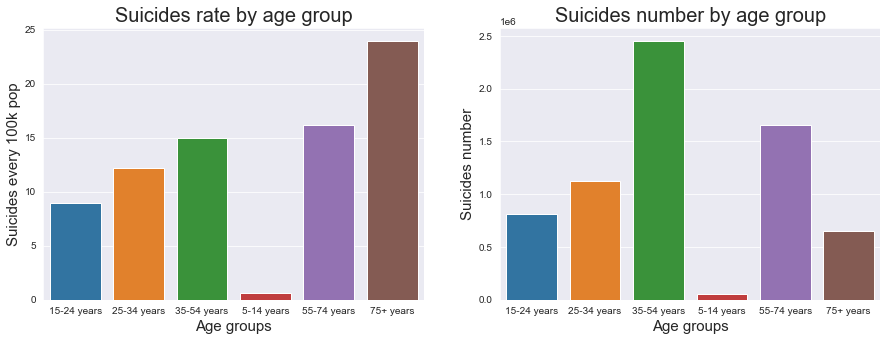

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(ax=ax[0], data=dfSR, x='age', y='suicides/100k pop')
ax[0].set_title('Suicides rate by age group', size=20)
ax[0].set_ylabel('Suicides every 100k pop', size=15)
ax[0].set_xlabel('Age groups', size=15)

sns.barplot(ax=ax[1], data=dfSN, x='age', y='suicides_no')
ax[1].set_title('Suicides number by age group', size=20)
ax[1].set_ylabel('Suicides number', size=15)
ax[1].set_xlabel('Age groups', size=15)

plt.show()

### Question 2:
# Which countries have the most and the least number of suicides?

In [8]:
dfSC = df.groupby(['country'])['suicides_no'].sum().to_frame().sort_values('suicides_no').reset_index()

max_suicides = dfSC[dfSC['suicides_no'] == dfSC['suicides_no'].max()]
print('Country with the most number of suicides: ')
display(max_suicides)

min_suicides = dfSC[dfSC['suicides_no'] == dfSC['suicides_no'].min()]
print('Countries with the least number of suicides: ')
display(min_suicides)

Country with the most number of suicides: 


,country,suicides_no
100,Russian Federation,1209742


Countries with the least number of suicides: 


,country,suicides_no
0,Dominica,0
1,Saint Kitts and Nevis,0


### Question 3:
# What is the effect of the population on suicide rates?

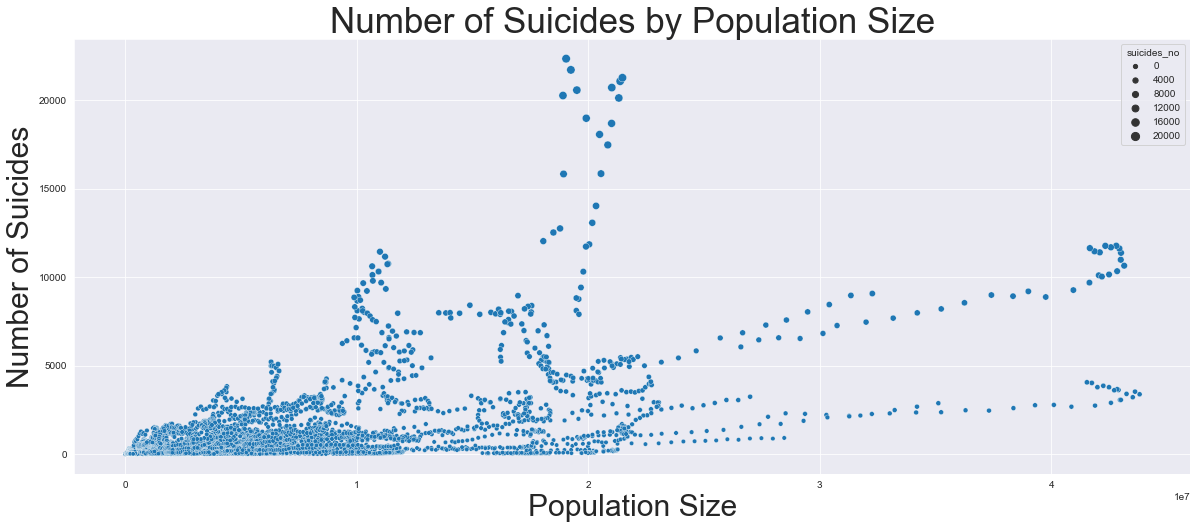

In [26]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(ax=ax, data=df, y='suicides_no', x='population', size='suicides_no')
plt.title('Number of Suicides by Population Size', size=35)
plt.xlabel('Population Size',size=30)
plt.ylabel('Number of Suicides',size=30)

plt.show()

### Question 4:
# What is the effect of the GDP of a country on suicide rates?

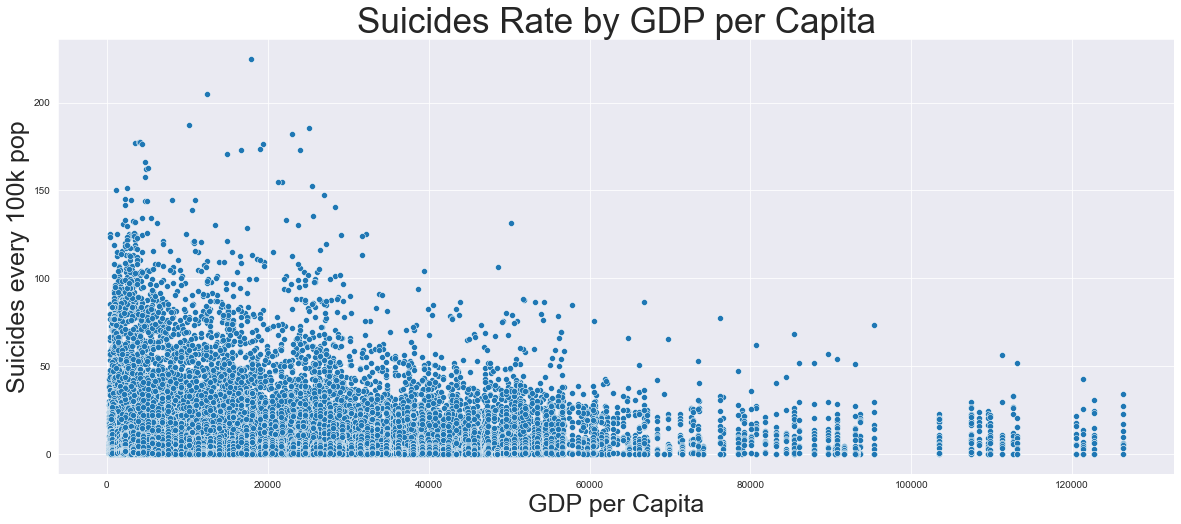

In [10]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(ax=ax, data=df, x='gdp_per_capita ($)', y='suicides/100k pop')
ax.set_title('Suicides Rate by GDP per Capita', size=35)
ax.set_ylabel('Suicides every 100k pop', size=25)
ax.set_xlabel('GDP per Capita', size=25)

plt.show()

### Question 5:
# What is the trend of suicide rates across all the years?

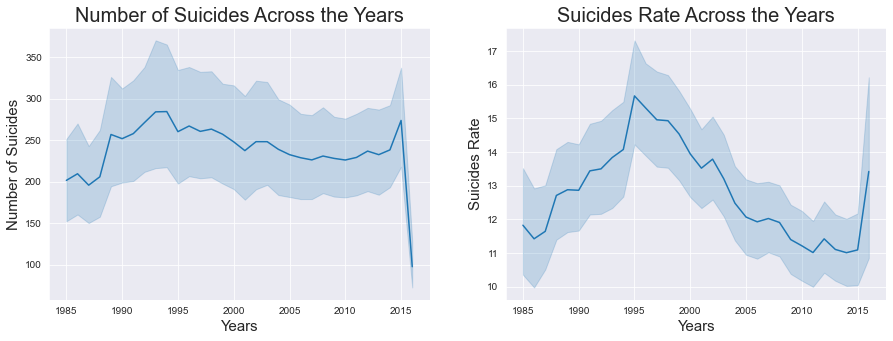

In [13]:
df.groupby(['year'])['suicides_no'].sum().to_frame()

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(ax=ax[0], data=df, x='year',y='suicides_no')
sns.lineplot(ax=ax[1], data=df, x='year',y='suicides/100k pop')
ax[0].set_title('Number of Suicides Across the Years', size=20)
ax[1].set_title('Suicides Rate Across the Years', size=20)
ax[0].set_xlabel('Years', size=15)
ax[1].set_xlabel('Years', size=15)
ax[0].set_ylabel('Number of Suicides', size=15)
ax[1].set_ylabel('Suicides Rate', size=15)

plt.show()

### Question 6
# Is there a difference between the suicide rates of men and women?

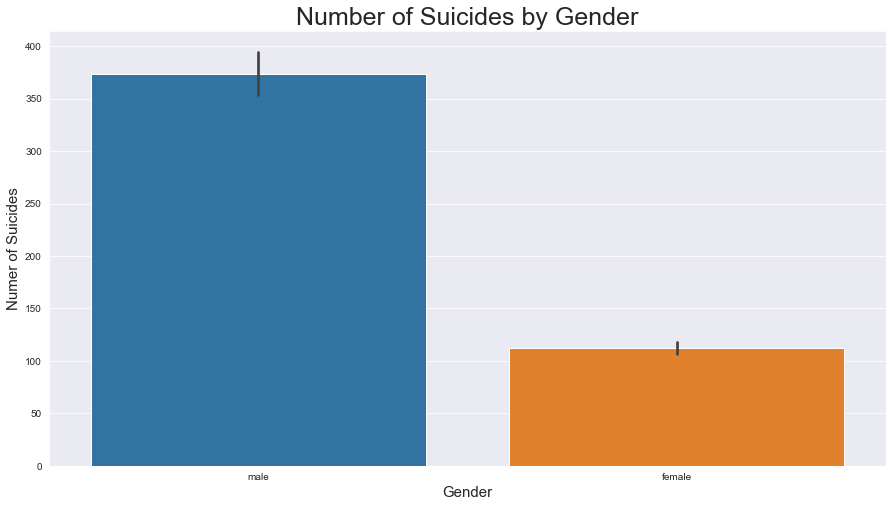

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(ax=ax, data=df, x='sex', y='suicides_no')
ax.set_title('Number of Suicides by Gender', size=25)
ax.set_ylabel('Numer of Suicides', size=15)
ax.set_xlabel('Gender', size=15)

plt.show()